In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
import re


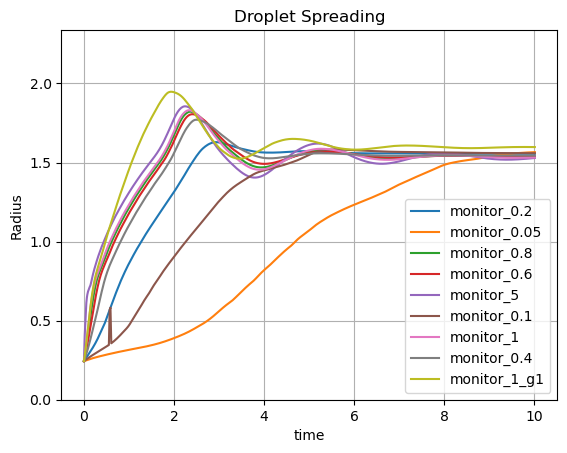

In [12]:
file_temp=next(os.walk('.'))[1]
cst=0
f_name=[""]
for temp in file_temp:
    match=re.search("monitor_*",temp)
    if match:
        f_name.append(temp)
        cst=cst+1
f_name=f_name[1:]

for f in f_name:
    temp=pd.read_csv('./'+f+'/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
    data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    plt.plot(data['Time'],data['Wetted'],label=f)

plt.ylim([0,np.max(data['Wetted']*1.2)])
plt.title('Droplet Spreading')
plt.xlabel('time')
plt.ylabel('Radius')
plt.legend()
plt.grid()
plt.show()
    

In [11]:
f_name

['monitor_0.2',
 'monitor_0.05',
 'monitor_0.8',
 'monitor_0.6',
 'monitor_5',
 'monitor_0.1',
 'monitor_1',
 'monitor_0.4']

In [6]:
for temp in file_temp:
    match=re.search("monitor_*",temp)
    if match:
        f_name.append(temp)
        cst=cst+1